In [6]:
# Import KNN, RandomForest, and DecisionTree classifiers
import pandas as pd

In [7]:
# Read the data again, assuming it's a different dataset
with open('../training_data/training_data.csv', 'r') as file:
    lines = [line.strip() for line in file.readlines()]
    
# Import the data
data = pd.read_csv('../training_data/merged.csv')

# Create column 'Ideology'
data['Ideology'] = None
# Iterate through each row in the data
for index, row in data.iterrows():
    if row['Target'] in ['Joe Biden', 'Bernie Sanders']:
        if row['Stance'] == 'FAVOR':
            data.at[index, 'Ideology'] = 'Liberal'
        elif row['Stance'] == 'AGAINST':
            data.at[index, 'Ideology'] = 'Conservative'
    elif row['Target'] == 'Donald Trump':
        if row['Stance'] == 'FAVOR':
            data.at[index, 'Ideology'] = 'Conservative'
        elif row['Stance'] == 'AGAINST':
            data.at[index, 'Ideology'] = 'Liberal'
            
data.to_csv('../training_data/raw_training_data.csv', index=False)
data

,Tweet,Target,Stance,Ideology
0,Maybe use should babysit for all of the single...,Donald Trump,AGAINST,Liberal
1,If I were Jared Kushner Id resign. Not only fo...,Donald Trump,AGAINST,Liberal
2,@realDonaldTrump the good news is. Your hair a...,Donald Trump,AGAINST,Liberal
3,So what would happen to @IvankaTrump voting ma...,Donald Trump,AGAINST,Liberal
4,She is my new hero! Yes! @NewYorkStateAG She i...,Donald Trump,AGAINST,Liberal
...,...,...,...,...
21569,Right? Drug them into mental illness and then ...,Donald Trump,FAVOR,Conservative
21570,Truly truly sad. We salute you Mr. President a...,Donald Trump,FAVOR,Conservative
21571,I have faith @realDonaldTrump will do somethin...,Donald Trump,FAVOR,Conservative
21572,Two people I'd pay not to listen to is #Donald...,Donald Trump,AGAINST,Liberal


In [8]:
import nltk
from nltk.corpus import wordnet as wn
from nltk.corpus import genesis
nltk.download('genesis')
nltk.download('wordnet')
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
genesis_ic = wn.ic(genesis, False, 0.0)

from nltk.tokenize import word_tokenize
from nltk.stem.porter import PorterStemmer
from nltk.stem import SnowballStemmer
from nltk.stem.lancaster import LancasterStemmer
from nltk.corpus import stopwords
from sklearn.metrics import roc_auc_score

[nltk_data] Downloading package genesis to
[nltk_data]     /usr/local/share/nltk_data...
[nltk_data]   Package genesis is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     /usr/local/share/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt to /usr/local/share/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /usr/local/share/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


In [9]:
# Create a function to preprocess the text
def preprocess_text(text):
    # Tokenize the text
    tokens = word_tokenize(text)
    
    # Remove punctuation
    tokens = [word for word in tokens if word.isalpha()]
    
    # Lowercase all words
    tokens = [word.lower() for word in tokens]
    
    # Remove stopwords
    stop_words = set(stopwords.words('english'))
    tokens = [word for word in tokens if not word in stop_words]
    
    # Stem the words
    porter = PorterStemmer()
    snowball = SnowballStemmer('english')
    lancaster = LancasterStemmer()
    tokens = [porter.stem(word) for word in tokens]
    
    return tokens

In [10]:
# Preprocess the text
data = pd.read_csv('../training_data/raw_training_data.csv')
data['Tweet'] = data['Tweet'].apply(preprocess_text)

# Save the preprocessed data
data.drop(columns=['Target', 'Stance'], inplace=True)
data

,Tweet,Ideology
0,"[mayb, use, babysit, singl, parent, scrambl, c...",Liberal
1,"[jare, kushner, id, resign, distract, he, caus...",Liberal
2,"[realdonaldtrump, good, news, hair, skin, tone...",Liberal
3,"[would, happen, ivankatrump, vote, machin, mfg...",Liberal
4,"[new, hero, ye, newyorkstateag, go, ti, get, t...",Liberal
...,...,...
21569,"[right, drug, mental, ill, forc, social, healt...",Conservative
21570,"[truli, truli, sad, salut, presid, itll, show,...",Conservative
21571,"[faith, realdonaldtrump, someth, pleas, sir, s...",Conservative
21572,"[two, peopl, pay, listen, donaldtrump, utter, ...",Liberal


In [47]:
# Clean blank lines
data = data[data['Tweet'].apply(lambda x: len(x) > 0)]
# save the preprocessed data
data.to_csv('../training_data/training_data.csv', index=False)

In [11]:
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.neighbors import KNeighborsClassifier
import numpy as np
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.model_selection import StratifiedKFold

In [24]:
data = pd.read_csv('../training_data/training_data.csv')
X = data['Tweet']
y = data['Ideology']

# Vectorize the text data
vectorizer = CountVectorizer()
X_vectorized = vectorizer.fit_transform(X)

# Initialize the k-NN classifier
knn = KNeighborsClassifier(n_neighbors=5)

# Initialize 10-fold stratified cross-validation
k_fold = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)

# Perform cross-validation and calculate accuracy
cv_accuracy = cross_val_score(knn, X_vectorized, y, cv=k_fold, scoring='accuracy')

# Print the mean and standard deviation of accuracy
print("Mean Accuracy:", cv_accuracy.mean())
print("Standard Deviation of Accuracy:", cv_accuracy.std())

Mean Accuracy: 0.5491790205649816
Standard Deviation of Accuracy: 0.008303979672268322


In [25]:
# Save the vectorizer
import joblib
import os
if not os.path.exists('../models'):
    os.makedirs('../models')
joblib.dump(vectorizer, '../models/count_vectorizer.pkl')

['../models/count_vectorizer.pkl']

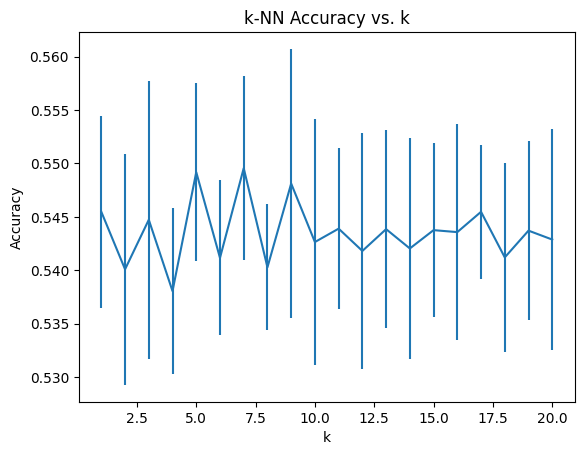

In [54]:
k_limit = 20
k_values = np.arange(1, k_limit + 1)
mean_accuracies = []
std_accuracies = []

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    cv_accuracy = cross_val_score(knn, X_vectorized, y, cv=k_fold, scoring='accuracy')
    mean_accuracies.append(cv_accuracy.mean())
    std_accuracies.append(cv_accuracy.std())
    
plt.errorbar(k_values, mean_accuracies, yerr=std_accuracies)
plt.xlabel('k')
plt.ylabel('Accuracy')
plt.title('k-NN Accuracy vs. k')
plt.show()

In [14]:
# Random Forest
from sklearn.ensemble import RandomForestClassifier

# Initialize the Random Forest classifier
rf = RandomForestClassifier(n_estimators=100, random_state=42)

# Perform cross-validation and calculate accuracy
cv_accuracy = cross_val_score(rf, X_vectorized, y, cv=k_fold, scoring='accuracy')

# Print the mean and standard deviation of accuracy
print("Mean Accuracy:", cv_accuracy.mean())
print("Standard Deviation of Accuracy:", cv_accuracy.std())

KeyboardInterrupt: 

In [62]:
# Use random forest to get feature importance
rf.fit(X_vectorized, y)
feature_importances = rf.feature_importances_
feature_names = vectorizer.get_feature_names_out()
features = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importances})
features = features.sort_values(by='Importance', ascending=False)
features

,Feature,Importance
1857,biden,0.008130
8134,gop,0.006400
4987,democrat,0.005937
20267,trump,0.005718
4931,dem,0.004865
...,...,...
3335,chinazi,0.000000
16668,rigth,0.000000
21996,wazoo,0.000000
6358,epistroph,0.000000


In [ ]:
# train the model on the entire dataset
rf.fit(X_vectorized, y)

In [64]:
# save the model
import joblib
import os
if not os.path.exists('../models'):
    os.makedirs('../models')
joblib.dump(rf, '../models/random_forest_model.pkl')

['../models/random_forest_model.pkl']

In [56]:
# Decision Tree
from sklearn.tree import DecisionTreeClassifier

# Initialize the Decision Tree classifier
dt = DecisionTreeClassifier(random_state=42)

# Perform cross-validation and calculate accuracy
cv_accuracy = cross_val_score(dt, X_vectorized, y, cv=k_fold, scoring='accuracy')

# Print the mean and standard deviation of accuracy
print("Mean Accuracy:", cv_accuracy.mean())
print("Standard Deviation of Accuracy:", cv_accuracy.std())

Mean Accuracy: 0.6265416646794733
Standard Deviation of Accuracy: 0.009736746150522776


In [ ]:
# Save the model
dt.fit(X_vectorized, y)
joblib.dump(dt, '../models/decision_tree_model.pkl')

In [58]:
# Naive Bayes
from sklearn.naive_bayes import MultinomialNB

# Initialize the Naive Bayes classifier
nb = MultinomialNB()

# Perform cross-validation and calculate accuracy
cv_accuracy = cross_val_score(nb, X_vectorized, y, cv=k_fold, scoring='accuracy')

# Print the mean and standard deviation of accuracy
print("Mean Accuracy:", cv_accuracy.mean())
print("Standard Deviation of Accuracy:", cv_accuracy.std())

Mean Accuracy: 0.7007511806077418
Standard Deviation of Accuracy: 0.007620645288150217


In [ ]:
# Save the model
nb.fit(X_vectorized, y)
joblib.dump(nb, '../models/naive_bayes_model.pkl')

In [59]:
# SVM
from sklearn.svm import SVC
        
# Initialize the SVM classifier
svm = SVC(kernel='linear', random_state=42)
        
# Perform cross-validation and calculate accuracy
cv_accuracy = cross_val_score(svm, X_vectorized, y, cv=k_fold, scoring='accuracy')

# Print the mean and standard deviation of accuracy
print("Mean Accuracy:", cv_accuracy.mean())
print("Standard Deviation of Accuracy:", cv_accuracy.std())

Mean Accuracy: 0.6677032512203516
Standard Deviation of Accuracy: 0.010210885987954114


In [ ]:
# Save the model
svm.fit(X_vectorized, y)
joblib.dump(svm, '../models/svm_model.pkl')

In [60]:
# Logistic Regression
from sklearn.linear_model import LogisticRegression

# Initialize the Logistic Regression classifier
lr = LogisticRegression(max_iter=1000, random_state=42)

# Perform cross-validation and calculate accuracy
cv_accuracy = cross_val_score(lr, X_vectorized, y, cv=k_fold, scoring='accuracy')

# Print the mean and standard deviation of accuracy
print("Mean Accuracy:", cv_accuracy.mean())
print("Standard Deviation of Accuracy:", cv_accuracy.std())

Mean Accuracy: 0.6852698050144304
Standard Deviation of Accuracy: 0.008386477214418625


In [65]:
# Save the model
lr.fit(X_vectorized, y)
joblib.dump(lr, '../models/logistic_regression_model.pkl')

['../models/logistic_regression_model.pkl']

In [53]:
import os
import joblib
# use rf to predict the test data
# Load the RandomForestClassifier model
model = joblib.load('../models/random_forest_model.pkl')

# Load the CountVectorizer used for training
vectorizer = joblib.load('../models/count_vectorizer.pkl')
data_dir = '../preprocessed_comments'
comments_files = [file for file in os.listdir(data_dir) if file.endswith('cleaned.csv')]
comments_files

['CNN-Full Speech: President Biden’s 2024 State of the Union address-cleaned.csv',
 "Fox News-Watch: President Biden's State of the Union address and the GOP's response-cleaned.csv",
 'CNN-Judge orders Trump to pay $355 million in civil fraud trial-cleaned.csv',
 'Fox News-Trump ordered to pay $364M, found liable in civil fraud trial-cleaned.csv',
 'MSNBC-WATCH: Full 2024 State of the Union address | MSNBC-cleaned.csv']

In [54]:
import pandas as pd

In [55]:
# test the model on a sentence
sentence = 'I love Joe Biden'
sentence_vectorized = vectorizer.transform([sentence])
model.predict(sentence_vectorized)

array(['Liberal'], dtype=object)

In [56]:
import re


def clean_text(text):
    # Remove emojis, special symbols, and extra whitespaces
    cleaned_text = re.sub(r'[^\w\s]', '', text)
    cleaned_text = re.sub(r'\s+', ' ', cleaned_text)
    # Remove leading and trailing whitespaces
    cleaned_text = cleaned_text.strip()
    # Convert to lowercase
    cleaned_text = cleaned_text.lower()
    # remove stopwords
    stop_words = set(stopwords.words('english'))
    cleaned_text = ' '.join([word for word in cleaned_text.split() if word not in stop_words])
    return cleaned_text

In [59]:
import csv


for file in comments_files:
    with open(os.path.join(data_dir, file), 'r') as f:
        df = pd.read_csv(f)
        # strip non-ascci characters
        df['comment'] = df['comment'].apply(lambda x: x.encode('ascii', 'ignore').decode())
        # add column for prediction
        df['ideology'] = None
        # iterate through each row in the data
        for index, row in df.iterrows():
            try:
                sentence = row['comment']
                sentence_vectorized = vectorizer.transform([sentence])
                prediction = model.predict(sentence_vectorized)
                df.at[index, 'ideology'] = prediction[0]
            except UnicodeDecodeError:
                print(row['comment'])
                continue

EmptyDataError: No columns to parse from file